# Project 1
Dataset: https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa 
It is about customer spending habits, found in kaggle.

In [3]:
# # Install dependencies as needed:
# # pip install kagglehub[pandas-datasets]
# import kagglehub
# from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score, roc_curve, auc

In [4]:
#using the cleaned_data file "cleaned_data.csv"
cleaned_df = pd.read_csv("cleaned_data.csv")
df_logis = pd.read_csv("cluster_labels.csv")

df_logis['Customer Age'] = cleaned_df['Customer Age']
df_logis['Age Group'] = cleaned_df['Age Group']

df_logis.head()
cleaned_df.head()

,Year,Customer Age,Customer Gender,Product Category,Quantity,Unit Price,Profit Margin,Age Group,Quarter
0,2016,29,F,Accessories,1,109.000000,0.266055,25-34,Q1
1,2016,29,F,Clothing,2,28.500000,0.140351,25-34,Q1
2,2016,29,F,Accessories,3,5.000000,0.266667,25-34,Q1
3,2016,29,F,Accessories,2,116.500000,0.248927,25-34,Q1
4,2016,29,F,Accessories,3,41.666667,0.160000,25-34,Q1


In [5]:
df_encoded = pd.get_dummies(df_logis, columns=['Cluster','Country', 'Product Category','Age Group','State'], drop_first=False)
print(df_encoded.columns)

# print(df_end.describe())
# print(df_end.info())
# df_end

Index(['index', 'Date', 'Customer Gender', 'Sub Category', 'Quantity',
       'Revenue', 'Customer Age', 'Cluster_0', 'Cluster_1', 'Cluster_2',
       'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7',
       'Cluster_8', 'Country_France', 'Country_Germany',
       'Country_United Kingdom', 'Country_United States',
       'Product Category_Accessories', 'Product Category_Bikes',
       'Product Category_Clothing', 'Age Group_18-24', 'Age Group_25-34',
       'Age Group_35-44', 'Age Group_45-54', 'Age Group_55-64',
       'Age Group_65+', 'Age Group_<18', 'State_Alabama', 'State_Arizona',
       'State_Bayern', 'State_Brandenburg', 'State_California',
       'State_Charente-Maritime', 'State_England', 'State_Essonne',
       'State_Florida', 'State_Garonne (Haute)', 'State_Georgia',
       'State_Hamburg', 'State_Hauts de Seine', 'State_Hessen',
       'State_Illinois', 'State_Kentucky', 'State_Loir et Cher',
       'State_Loiret', 'State_Massachusetts', 'State_Minnesota',

In [6]:
#This is makes the dataset easier to work with, it makes bool values into 0 and 1
for col in df_encoded.select_dtypes(include=['bool']).columns:
    df_encoded[col] = df_encoded[col].astype(int)

df_encoded.head(5)

,index,Date,Customer Gender,Sub Category,Quantity,Revenue,Customer Age,Cluster_0,Cluster_1,Cluster_2,...,State_Somme,State_South Carolina,State_Texas,State_Utah,State_Val d'Oise,State_Val de Marne,State_Virginia,State_Washington,State_Wyoming,State_Yveline
0,0,02/19/16,F,Tires and Tubes,1.0,109.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,02/20/16,F,Gloves,2.0,57.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,02/27/16,F,Tires and Tubes,3.0,15.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,03/12/16,F,Tires and Tubes,2.0,233.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,03/12/16,F,Tires and Tubes,3.0,125.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0


R-squared: -1.4714932925833453


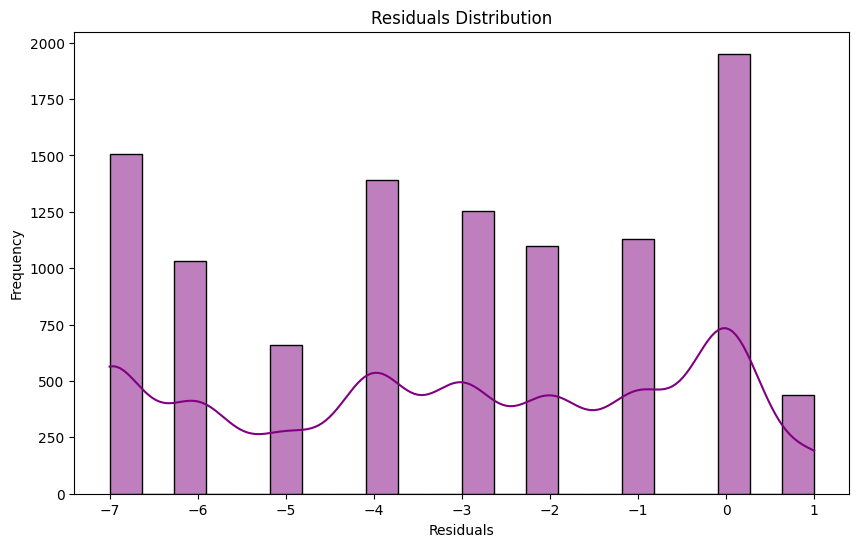

Accuracy: 18.652007648183556 %


In [7]:
# Step 1: Define the target variable and features
X = df_encoded[['Country_United States']]  
y = df_logis['Cluster']  # Replace 'Target_Variable' with your actual target column

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the logistic regression model
log_model = LogisticRegression(max_iter=100)
log_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_model.predict(X_test)

# Step 5: Evaluate the model
print("R-squared:", r2_score(y_test, y_pred))

# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print("Accuracy:", (accuracy_score(y_test, y_pred)) * 100, "%")

Accuracy: 62.70433036994552 %


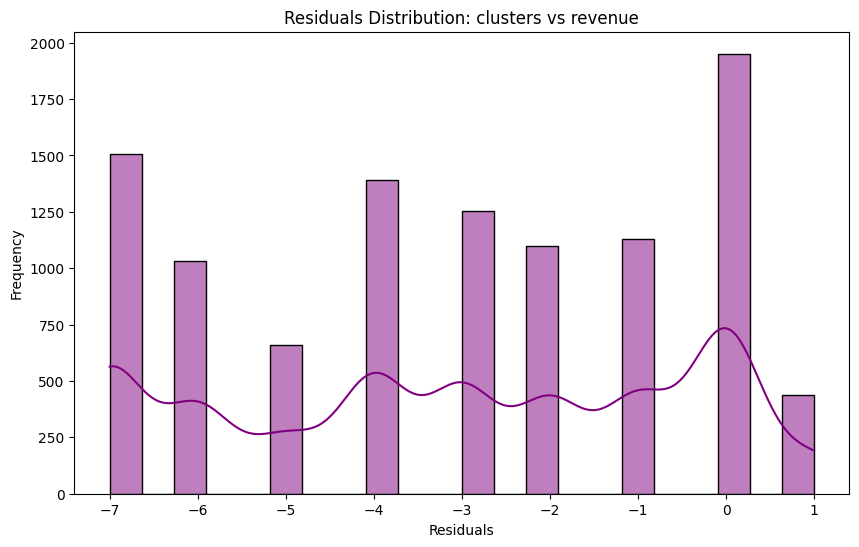

In [8]:
# df_encoded = pd.get_dummies(df_logis, columns=['Country', 'Product Category','Cluster','Age Group','State'], drop_first=False)

#Comparing clusters to the revenue
X = df_encoded[['Cluster_0','Cluster_1', 'Cluster_2', 'Cluster_3',
				]]
y = df_logis['Cluster']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution: clusters vs revenue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Accuracy with features: USA, bikes, ages 25-34  26.67049039288787


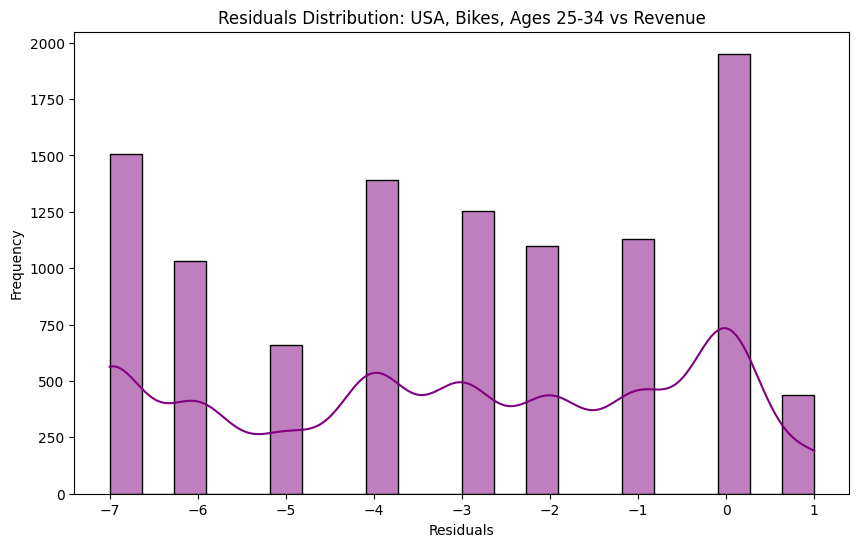

In [9]:
#Another model:

X_fet = df_encoded[['Country_United States', 'Product Category_Bikes', 'Age Group_25-34']]
y_fet = df_logis['Cluster']  # Replace 'Target_Variable' with your actual target column

X_train_fet, X_test_fet, y_train_fet, y_test_fet = train_test_split(X_fet, y_fet, test_size=0.2, random_state=42)
model_fet = LogisticRegression()
model_fet.fit(X_train_fet, y_train_fet)
y_pred_fet = model_fet.predict(X_test_fet)

accuracy_fet = accuracy_score(y_test_fet, y_pred_fet)
print("Accuracy with features: USA, bikes, ages 25-34 ", (100* accuracy_fet))

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution: USA, Bikes, Ages 25-34 vs Revenue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Accuracy with combined features: USA, electronics, clusters 1-4  49.22569544020648


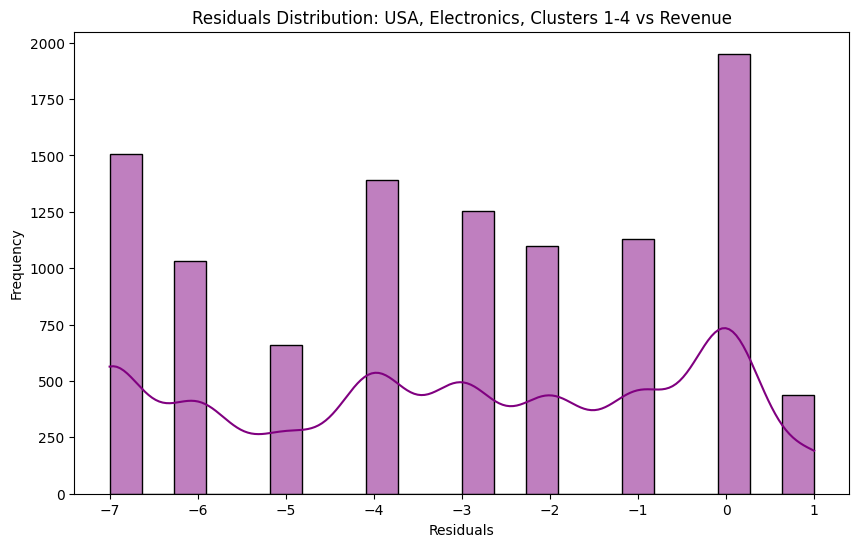

In [51]:
#what if i were to merge the features


X_comb = df_encoded[['Country_United States', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Product Category_Accessories']]
y_comb = df_logis['Cluster']

X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(X_comb, y_comb, test_size=0.2, random_state=42)

model_comb = LogisticRegression()
model_comb.fit(X_train_comb, y_train_comb)
y_pred_comb = model_comb.predict(X_test_comb)
accuracy_comb = accuracy_score(y_test_comb, y_pred_comb)
print("Accuracy with combined features: USA, electronics, clusters 1-4 ", (100* accuracy_comb))

#plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution: USA, Electronics, Clusters 1-4 vs Revenue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [1]:
# df_encoded.columns

In [58]:
# Define features and target
X = df_encoded[['Country_United States', 'Product Category_Accessories']]  # Example features
y = df_logis['Cluster']  # Target variable

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Train the logistic regression model
log_model = LogisticRegression(max_iter=100)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", (100 * accuracy))

Accuracy: 19.33078393881453


Time to make visuals on logistic regression

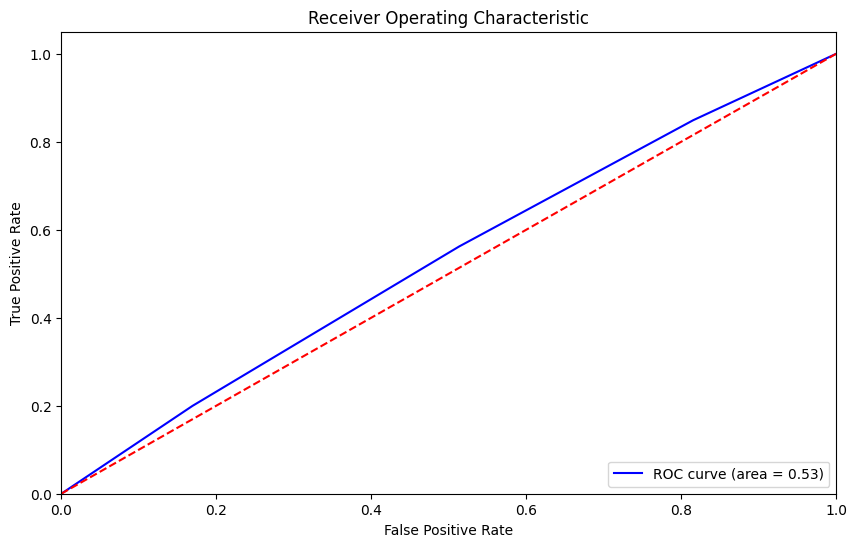

In [ ]:
# Compute ROC curve and AUC

# Binarize the output for multiclass ROC (e.g., for class 1)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# Get predicted probabilities for class 1 (or any class index you want)
y_score = log_model.predict_proba(X_test)[:, 1]  # Change 1 to the class index you want

fpr, tpr, thresholds = roc_curve(y_test_bin[:, 1], y_score)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


/var/folders/x_/_l4rp9ln2lx_450s4hxz6rd40000gn/T/ipykernel_32844/1011717321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_fet, palette='viridis')


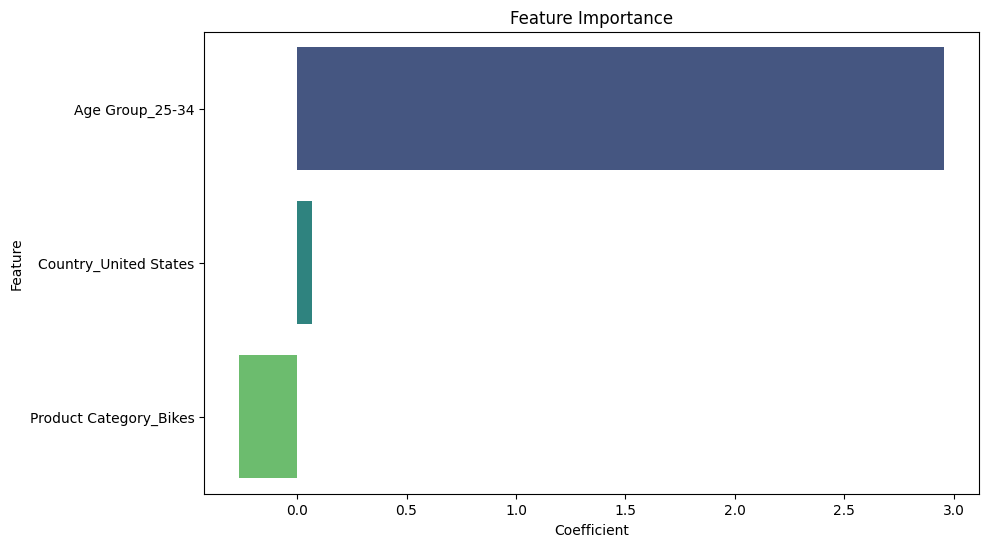

In [63]:
import seaborn as sns

# Extract feature importance
coefficients_fet = pd.DataFrame({
    'Feature': X_fet.columns,
    'Coefficient': model_fet.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_fet, palette='viridis')
plt.title('Feature Importance')
plt.show()

/var/folders/x_/_l4rp9ln2lx_450s4hxz6rd40000gn/T/ipykernel_32844/147254579.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_comb, palette='viridis')


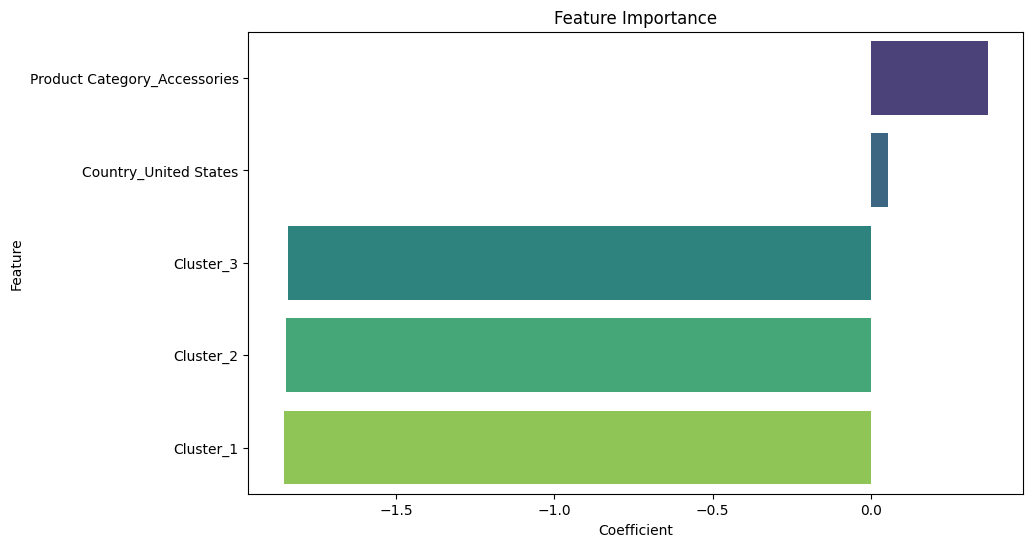

In [64]:
Features = cleaned_df.columns.tolist()
# Remove the target variable from the list
#extract feature importance
# Ensure the features used in the model match the coefficients
coefficients_comb = pd.DataFrame({
    'Feature': X_comb.columns,  # Use the columns from X_comb to match the model
    'Coefficient': model_comb.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_comb, palette='viridis')
plt.title('Feature Importance')
plt.show()

different model examples:
this is with using different combinations of features

Accuracy with model 1:  69.95985087467737


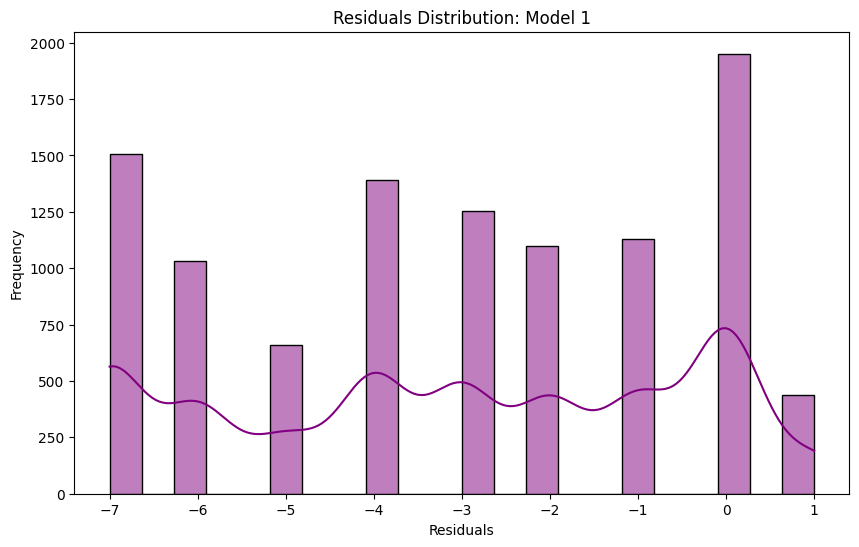

In [65]:
#model 1: using features: Age Group_18-24', 'Age Group_25-34', 'Age Group_35-44','Age Group_45-54', 'Age Group_55-64', all the clusters, and 'Product Category_Accessories'
X1 = df_encoded[['Country_United States', 'Product Category_Accessories', 'Age Group_18-24', 'Age Group_25-34', 'Age Group_35-44','Age Group_45-54', 'Age Group_55-64', 'Cluster_0','Cluster_1', 'Cluster_2', 'Cluster_3']]
y1 = df_logis['Cluster']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy with model 1: ", (100 * accuracy1))
# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution: Model 1')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Accuracy with model 2:  71.06395182104961


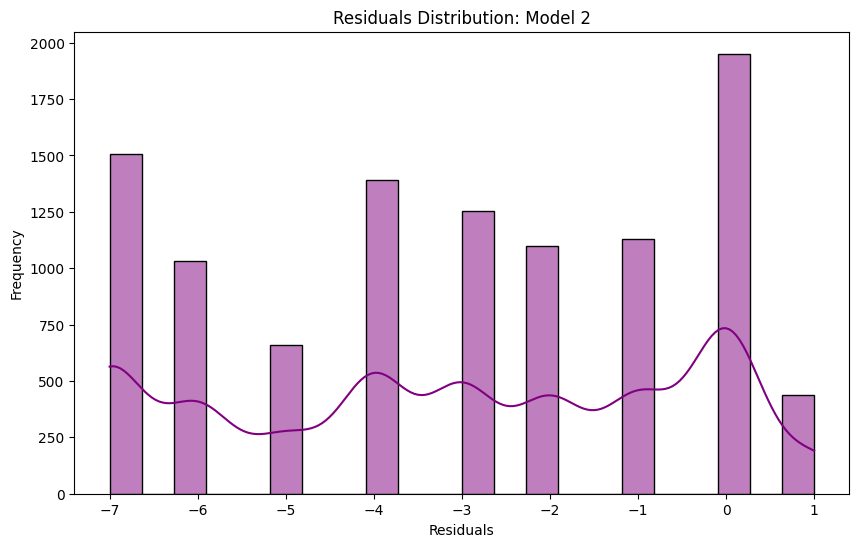

Improved Accuracy with model 2 (scaled features):  71.06395182104961


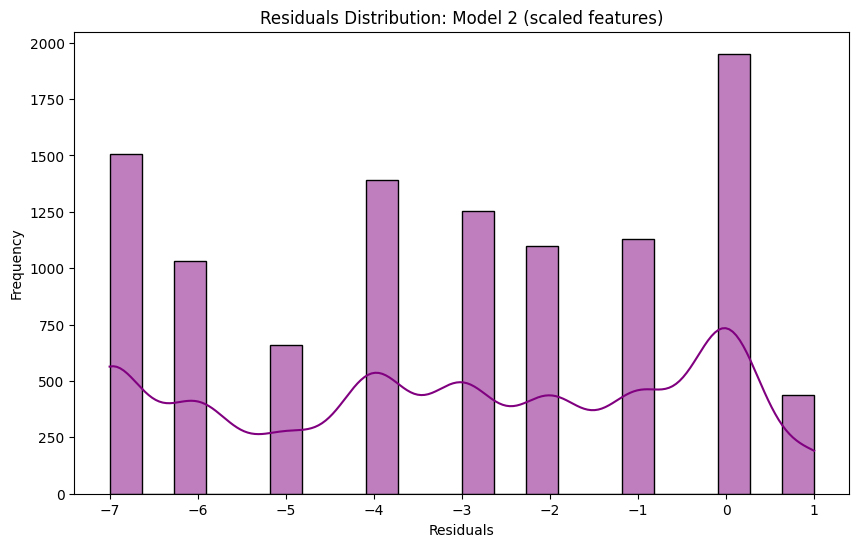

In [ ]:
#model 2: using features: 'Country_United States', 'Product Category_bikes', 'Age Group_18-24', 'Age Group_25-34', 'Age Group_35-44','Age Group_45-54', 'Age Group_55-64', all the clusters, and 'Product Category_Accessories'
X2 = df_encoded[['Country_United States', 'Product Category_Bikes', 'Age Group_18-24', 'Age Group_25-34', 'Age Group_35-44','Age Group_45-54', 'Age Group_55-64', 'Cluster_0','Cluster_1', 'Cluster_2', 'Cluster_3']]
y2 = df_logis['Cluster']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy with model 2: ", (100 * accuracy2))
# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution: Model 2')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Improve the model by scaling features

scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Retrain the model with scaled features
model2_scaled = LogisticRegression()
model2_scaled.fit(X_train2_scaled, y_train2)
y_pred2_scaled = model2_scaled.predict(X_test2_scaled)

# Evaluate the improved model
accuracy2_scaled = accuracy_score(y_test2, y_pred2_scaled)
print("Improved Accuracy with model 2 (scaled features): ", (100 * accuracy2_scaled))

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution: Model 2 (scaled features)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

/Users/ggrojas27/Documents/GitHub/INDENG142_Sp25/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with model 3:  21.279036420992256


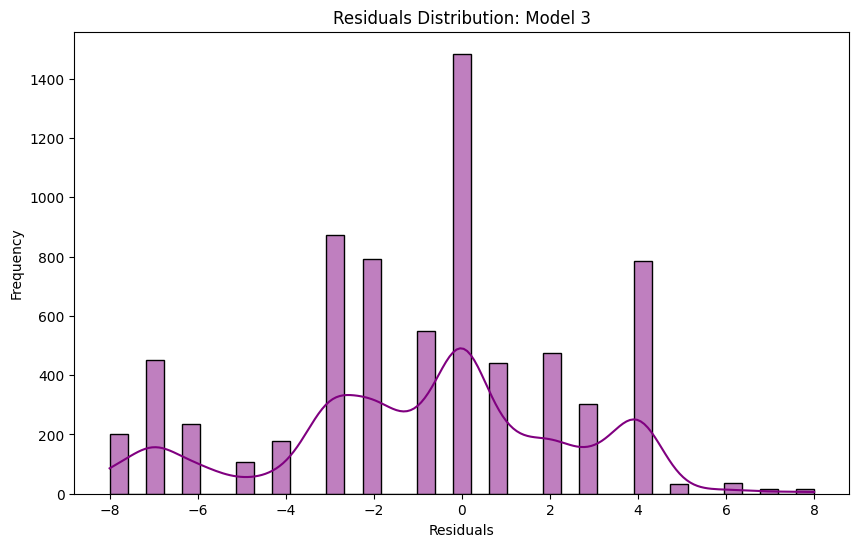

In [66]:
#model 3: using features: 'France', 'Product category_bikes', 'Age Group_18-24', all the clusters
X3 = df_encoded[['Country_France', 'Product Category_Bikes', 'Age Group_18-24']]
y3 = df_logis['Cluster']
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs')

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy with model 3: ", (100 * accuracy3))
# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test3 - y_pred3, kde=True, color='purple')
plt.title('Residuals Distribution: Model 3')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
y_pred3 = model3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
